In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

# 단어의 수를 맞춤
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [3]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0

In [4]:
# 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
1250/1250 [==============================] - 55s 42ms/step - loss: 0.4404 - accuracy: 0.7855 - val_loss: 0.3722 - val_accuracy: 0.8347
Epoch 2/200
1250/1250 [==============================] - 51s 41ms/step - loss: 0.3657 - accuracy: 0.8376 - val_loss: 0.3566 - val_accuracy: 0.8394
Epoch 3/200
1250/1250 [==============================] - 52s 42ms/step - loss: 0.3402 - accuracy: 0.8487 - val_loss: 0.3452 - val_accuracy: 0.8440
Epoch 4/200
1250/1250 [==============================] - 51s 41ms/step - loss: 0.3231 - accuracy: 0.8598 - val_loss: 0.3437 - val_accuracy: 0.8444
Epoch 5/200
1250/1250 [==============================] - 57s 45ms/step - loss: 0.3045 - accuracy: 0.8672 - val_loss: 0.3644 - val_accuracy: 0.8377
Epoch 6/200
1250/1250 [==============================] - 65s 52ms/step - loss: 0.2931 - accuracy: 0.8743 - val_loss: 0.3448 - val_accuracy: 0.8456
Epoch 7/200
1250/1250 [==============================] - 52s 42ms/step - loss: 0.2786 - accuracy: 0.8791 - val_loss: 0

In [6]:
print('Test Accuracy : %.4f'%(model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 12s 14ms/step - loss: 0.3581 - accuracy: 0.8488
Test Accuracy : 0.8488


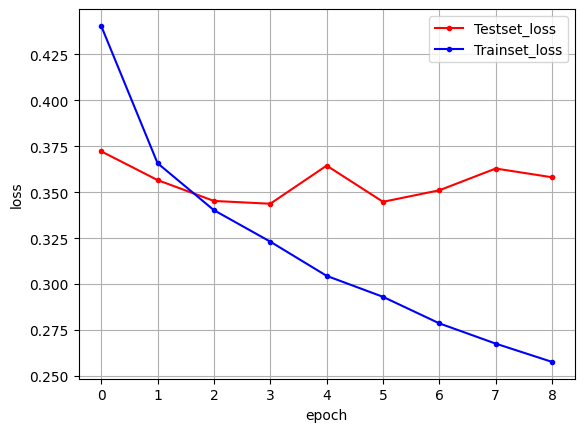

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_accuracy = history.history['accuracy']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()